In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('Mergerd_Dataset.csv')
dataset.head(10)

,day,lab_test,confirmed_case,death_case,first_dose,second_dose
0,4/4/2020,434,9,2,0,0
1,5/4/2020,367,18,1,0,0
2,6/4/2020,468,35,3,0,0
3,7/4/2020,679,41,5,0,0
4,8/4/2020,981,54,3,0,0
5,9/4/2020,905,112,1,0,0
6,10/4/2020,1184,94,6,0,0
7,11/4/2020,954,58,3,0,0
8,12/4/2020,1340,139,4,0,0
9,13-04-2020,1570,182,5,0,0


In [3]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['day']= label_encoder.fit_transform(dataset['day']) 
print(dataset.head(80))

    day  lab_test  confirmed_case  death_case  first_dose  second_dose
0   509       434               9           2           0            0
1   530       367              18           1           0            0
2   551       468              35           3           0            0
3   572       679              41           5           0            0
4   593       981              54           3           0            0
..  ...       ...             ...         ...         ...          ...
75  195     16259            3803          38           0            0
76  216     15045            3243          45           0            0
77  257     14031            3240          37           0            0
78  278     15585            3531          39           0            0
79  298     15555            3480          38           0            0

[80 rows x 6 columns]


In [4]:
dataset.shape

(626, 6)

In [5]:
dataset.describe()

,day,lab_test,confirmed_case,death_case,first_dose,second_dose
count,626.000000,626.000000,626.000000,626.000000,6.260000e+02,6.260000e+02
mean,312.500000,18033.835463,2526.009585,44.798722,1.097140e+05,7.309854e+04
std,180.854914,9357.619008,2936.765446,54.528270,3.617676e+05,2.869615e+05
min,0.000000,367.000000,9.000000,0.000000,0.000000e+00,0.000000e+00
25%,156.250000,12869.500000,657.750000,14.000000,0.000000e+00,0.000000e+00
50%,312.500000,15557.000000,1637.000000,30.000000,0.000000e+00,0.000000e+00
75%,468.750000,20982.750000,2953.500000,44.000000,9.829925e+04,1.226475e+04
max,625.000000,55284.000000,16230.000000,264.000000,6.625123e+06,5.444166e+06


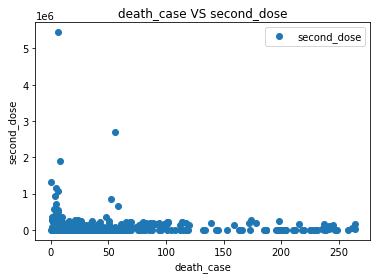

In [6]:
dataset.plot(x='death_case', y='second_dose', style='o')  
plt.title('death_case VS second_dose')  
plt.xlabel('death_case')  
plt.ylabel('second_dose')  
plt.show()

In [7]:
X= dataset.drop('death_case', axis=1)
y= dataset['death_case']

print('Shape of X =', X.shape)
print('Shape of y =', y.shape)

Shape of X = (626, 5)
Shape of y = (626,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=51)
 
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (500, 5)
Shape of y_train =  (500,)
Shape of X_test =  (126, 5)
Shape of y_test =  (126,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [11]:
X_train_poly.shape, X_test_poly.shape

((500, 21), (126, 21))

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
lr.score(X_test_poly, y_test,)

0.3411413805706671

In [15]:
lr.predict([X_test_poly[0,:]])

array([-397.78482767])

In [16]:
y_pred = lr.predict(X_test_poly)
y_pred

array([-3.97784828e+02,  3.50165660e+01,  2.67227531e+01,  2.97002427e+01,
        5.53547465e+00,  2.27366013e+01,  1.82868414e+01,  2.42318330e+02,
        1.51201542e+02,  5.91852372e+01,  3.49018918e+01,  1.10746784e+01,
        2.31479316e+01,  3.46537312e+01,  2.05986949e+02,  1.14031829e+01,
        8.57126992e+00,  3.61440424e+01,  8.13887804e+00,  6.27776413e+01,
        2.84551725e+01,  4.01064637e+01,  6.11627451e+00,  1.50595611e+01,
        4.95062110e+01,  1.17622327e+01,  1.34255391e+02,  4.68610608e+01,
        7.24144676e+00,  1.01777625e+01,  1.16413615e+01,  2.27856273e+01,
        8.63761318e+01,  2.33899376e+01,  7.47757612e+01,  5.03644256e+01,
        5.04616166e+00,  1.80609903e+01,  4.49920887e+01,  6.42539653e+01,
        6.86650840e+00,  8.61852514e+00,  3.95436711e+01,  1.10328323e+01,
        9.21304410e+01,  6.16605471e+01,  4.45639971e+01,  1.74363500e+01,
        1.05321750e+01,  3.83816215e+01,  2.18614281e+00,  1.55505149e+02,
        6.38035812e+01,  

In [17]:
y_test

542     31
235     39
46      16
215     17
619      3
      ... 
606      2
79      38
284     14
387     97
463    230
Name: death_case, Length: 126, dtype: int64

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
 
mse, rmse
 

(1739.902022906114, 41.71213280217297)